In [516]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

In [517]:
df= pd.read_csv('energy_data.csv')

In [518]:
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [519]:
df.tail()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98
999,Commercial,15813,57,11,31.40,Weekend,3423.63


In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [521]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


In [522]:
df.shape

(1000, 7)

In [523]:
df.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [524]:
df.isnull().sum().sum()

0

In [525]:
df.duplicated().sum()

0

In [526]:
num_columns =['Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature',
       'Energy Consumption']
num_columns

['Square Footage',
 'Number of Occupants',
 'Appliances Used',
 'Average Temperature',
 'Energy Consumption']

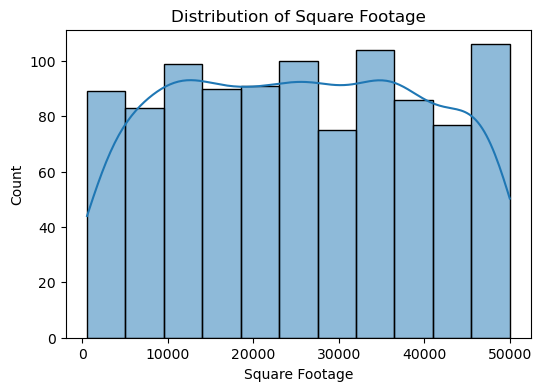

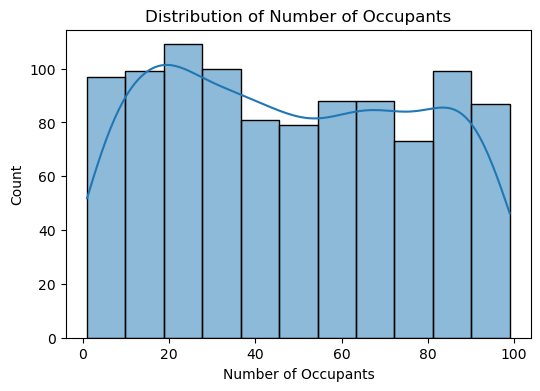

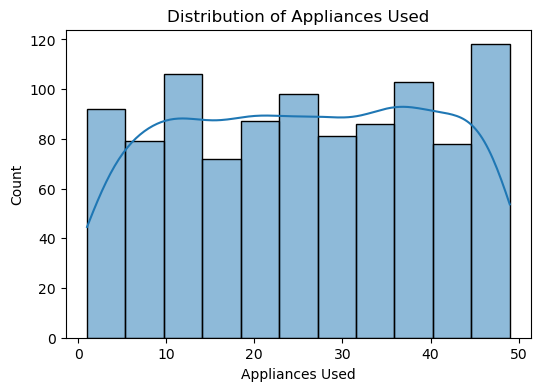

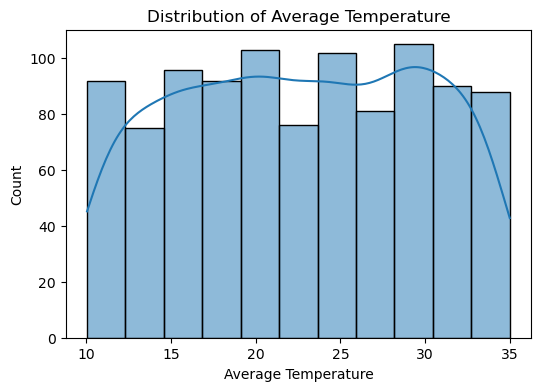

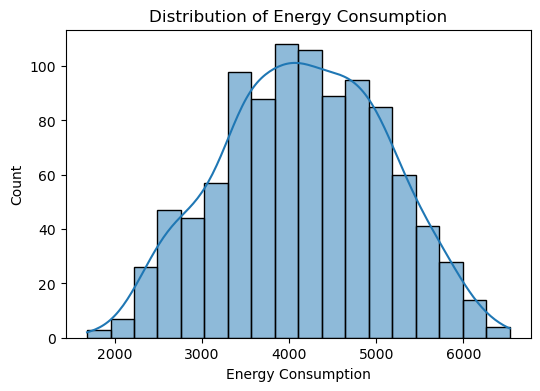

In [527]:
for i in num_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

In [528]:
df['Day of Week'].value_counts()

Day of Week
Weekday    507
Weekend    493
Name: count, dtype: int64

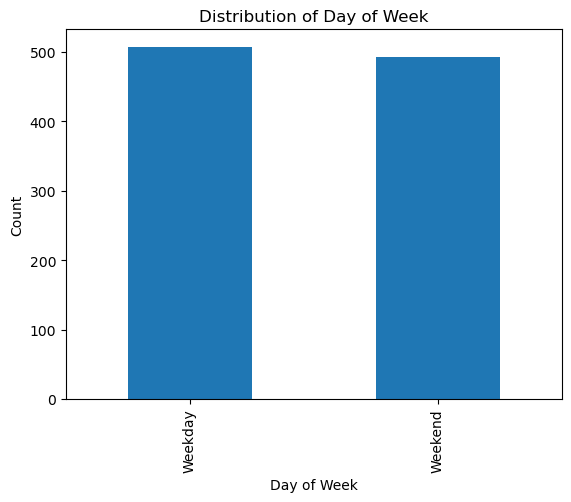

In [529]:
df['Day of Week'].value_counts().plot(kind='bar')
plt.title('Distribution of Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

In [530]:
df['Building Type'].value_counts()

Building Type
Residential    347
Commercial     336
Industrial     317
Name: count, dtype: int64

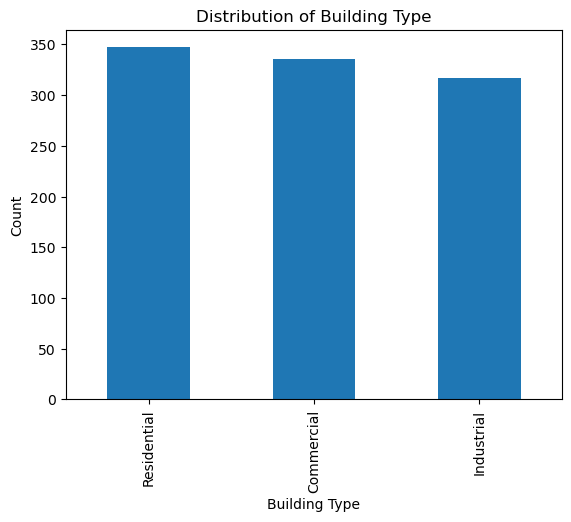

In [531]:
df['Building Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Building Type')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.show()

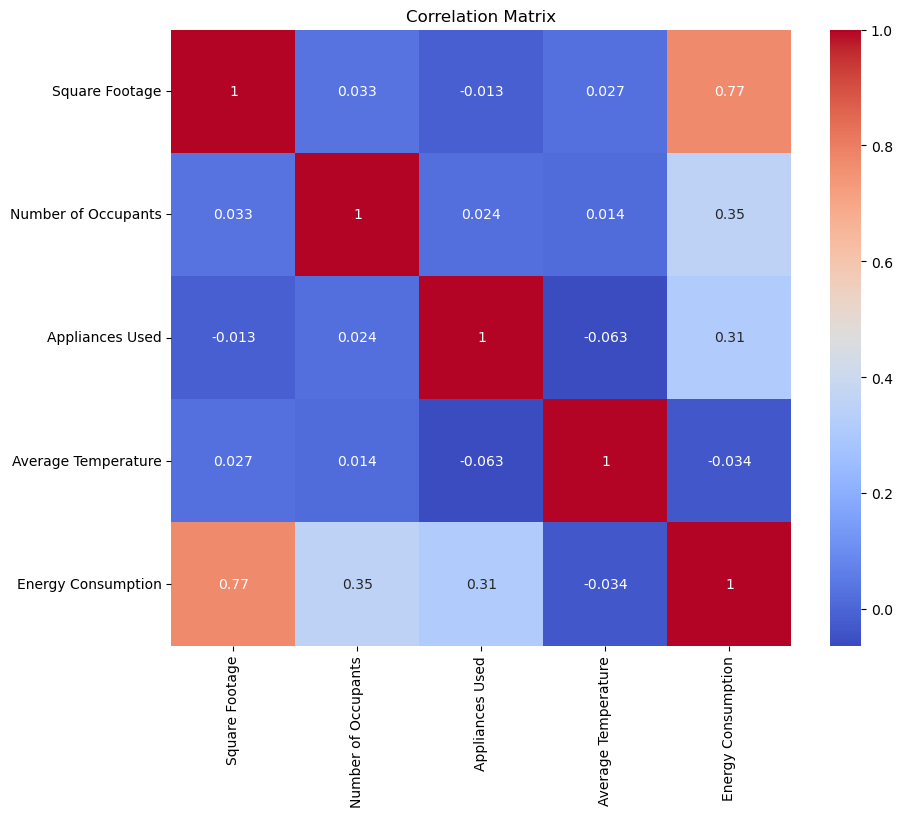

In [532]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [533]:
X= df.drop('Energy Consumption', axis=1)
y= df['Energy Consumption']

In [534]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [535]:
numeric_columns =['Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature']

In [536]:
preprocessor= ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Day of Week', 'Building Type'])
    ]
)

In [537]:
X_train_processed= preprocessor.fit_transform(X_train)
X_test_processed= preprocessor.transform(X_test)

In [538]:
all_features = preprocessor.get_feature_names_out()
all_features

array(['num__Square Footage', 'num__Number of Occupants',
       'num__Appliances Used', 'num__Average Temperature',
       'cat__Day of Week_Weekday', 'cat__Day of Week_Weekend',
       'cat__Building Type_Commercial', 'cat__Building Type_Industrial',
       'cat__Building Type_Residential'], dtype=object)

In [539]:
X_train_df = pd.DataFrame(
    X_train_processed,
    columns=all_features,
    index=X_train.index
)

X_test_df = pd.DataFrame(
    X_test_processed,
    columns=all_features,
    index=X_test.index
)

In [540]:
print(X_train_df.head())

     num__Square Footage  num__Number of Occupants  num__Appliances Used  \
29              0.120184                 -1.214780              0.321025   
535            -1.074908                 -1.453382             -0.466767   
695            -0.202598                 -1.351124             -0.896472   
557             0.332615                 -0.635319              0.535878   
836            -0.624890                 -1.146608              0.893966   

     num__Average Temperature  cat__Day of Week_Weekday  \
29                   1.443981                       0.0   
535                 -0.270429                       1.0   
695                  0.508339                       1.0   
557                  0.160975                       0.0   
836                 -0.586979                       1.0   

     cat__Day of Week_Weekend  cat__Building Type_Commercial  \
29                        1.0                            0.0   
535                       0.0                            1.0

In [541]:
model = LinearRegression()
model.fit(X_train_df, y_train)

LinearRegression()

In [542]:
y_pred = model.predict(X_test_df)

In [543]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.0001885508557938191
R^2 Score: 0.9999999997684504


In [544]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
r2_scores = []

In [545]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_df, y_train)

    y_pred = ridge.predict(X_test_df)
    r2 = r2_score(y_test, y_pred)
    
    r2_scores.append(r2)
    
    print(f"Alpha: {alpha} | R² Score: {r2}")

Alpha: 0.0001 | R² Score: 0.9999999997680535
Alpha: 0.001 | R² Score: 0.999999999760796
Alpha: 0.01 | R² Score: 0.9999999993233804
Alpha: 0.1 | R² Score: 0.9999999584874866
Alpha: 1 | R² Score: 0.999995926055289
Alpha: 10 | R² Score: 0.9996141857223007
Alpha: 100 | R² Score: 0.9752740070966727


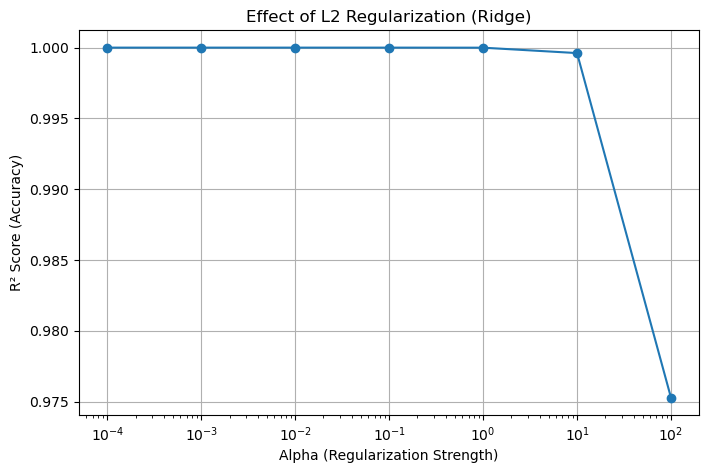

In [546]:
plt.figure(figsize=(8, 5))
plt.plot(alphas, r2_scores, marker='o')
plt.xscale('log')
plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("R² Score (Accuracy)")
plt.title("Effect of L2 Regularization (Ridge)")
plt.grid(True)
plt.show()
